Here we consider

- the various ways to use the `astropy` computed ephemerides and in particular how to understand the quantities in a geocentric (comoving?) coordinate system.  
- to understand how the old Ptolemaic system looked in a little more detail, and in particular how the planetary and epicycle periods were related to the synodic and sidereal periods of the heliocentric model
- understand how Kepler actually knew the distances to the planets
- motivate different ways to measure the distance to the planets 

How the geocentric model explained various facts is described OK-ly here:
https://en.wikipedia.org/wiki/Geocentric_model

In [3]:
import numpy as np
import pylab as plt
from astropy import units as u
from astropy import constants as c
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, AltAz, Angle, Latitude, Longitude
from astropy.coordinates import get_body

In [4]:
# Times
time_interval = 11 * 365 * u.day
halfyear = np.arange(182)
oneyear = np.arange(365)
twoyear = np.arange(365*2)
t0 = Time('2000-3-21 12:00:00')
dt_approx = 1*u.day
nsteps = int((time_interval/dt_approx).to(u.dimensionless_unscaled).value)
time_steps, dt = np.linspace(0,time_interval.value,num=nsteps, retstep=True)
time_steps = time_steps*u.day
dt = dt*u.day
times = t0 + time_steps

In [13]:
def GeocentricCoords(body_ephem):
    return {'r':body_ephem.geocentricmeanecliptic.distance, 'theta': body_ephem.geocentricmeanecliptic.lon}

def HeliocentricCoords(body_ephem):
    return {'r':body_ephem.barycentrictrueecliptic.distance, 'theta': body_ephem.barycentrictrueecliptic.lon}

In [6]:
%%time
""" 
Calculate ephemerides.  
Note that I've not included an earth location, since for this it's not necessary.
"""
sun = get_body('sun', times)
mercury = get_body('mercury', times)
venus = get_body('venus', times)
earth = get_body('earth', times)
moon = get_body('moon', times)
mars = get_body('mars', times)
jupiter = get_body('jupiter', times)

CPU times: user 8 s, sys: 16.3 ms, total: 8.02 s
Wall time: 8.03 s


In [8]:
%%time
names = ['moon','sun','mercury','venus','earth','mars','jupiter']
ephems = [moon, sun, mercury, venus, earth, mars, jupiter]
geocen = {}
for name, ephem in zip(names,ephems):
    geocen[name] = GeocentricCoords(ephem)   

CPU times: user 7.1 s, sys: 15.1 ms, total: 7.12 s
Wall time: 7.12 s


In [14]:
heliocen = {}
for name, ephem in zip(names,ephems):
    heliocen[name] = HeliocentricCoords(ephem)

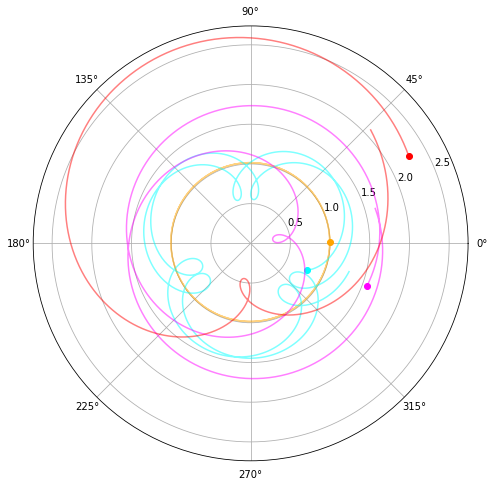

In [22]:
plt.figure(figsize=(8,8))
# Starting point
plt.polar(geocen['sun']['theta'].rad[0],geocen['sun']['r'][0],color='orange',marker='o')
plt.polar(geocen['mercury']['theta'].rad[0],geocen['mercury']['r'][0],color='cyan',marker='o')
plt.polar(geocen['venus']['theta'].rad[0],geocen['venus']['r'][0],color='magenta',marker='o')
plt.polar(geocen['mars']['theta'].rad[0],geocen['mars']['r'][0],color='red',marker='o')
# 
plt.polar(geocen['sun']['theta'].rad[twoyear],geocen['sun']['r'][twoyear],color='orange',alpha=0.5)
plt.polar(geocen['mercury']['theta'].rad[twoyear],geocen['mercury']['r'][twoyear],color='cyan',alpha=0.5)
plt.polar(geocen['venus']['theta'].rad[twoyear],geocen['venus']['r'][twoyear],color='magenta',alpha=0.5)
plt.polar(geocen['mars']['theta'].rad[twoyear],geocen['mars']['r'][twoyear],color='red',alpha=0.5)

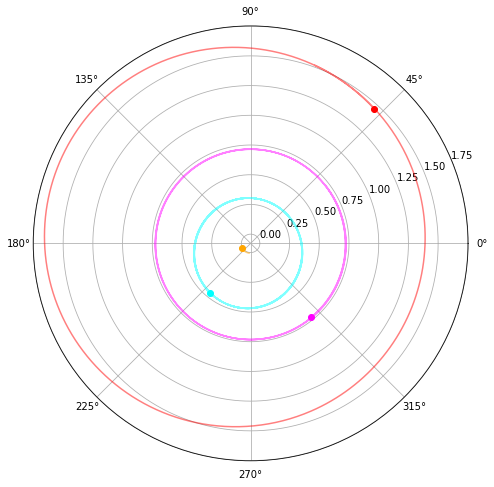

In [20]:
plt.figure(figsize=(8,8))
# Starting point
plt.polar(heliocen['sun']['theta'].rad[0],heliocen['sun']['r'][0],color='orange',marker='o')
plt.polar(heliocen['mercury']['theta'].rad[0],heliocen['mercury']['r'][0],color='cyan',marker='o')
plt.polar(heliocen['venus']['theta'].rad[0],heliocen['venus']['r'][0],color='magenta',marker='o')
plt.polar(heliocen['mars']['theta'].rad[0],heliocen['mars']['r'][0],color='red',marker='o')
# 
plt.polar(heliocen['sun']['theta'].rad[twoyear],heliocen['sun']['r'][twoyear],color='orange',alpha=0.5)
plt.polar(heliocen['mercury']['theta'].rad[twoyear],heliocen['mercury']['r'][twoyear],color='cyan',alpha=0.5)
plt.polar(heliocen['venus']['theta'].rad[twoyear],heliocen['venus']['r'][twoyear],color='magenta',alpha=0.5)
plt.polar(heliocen['mars']['theta'].rad[twoyear],heliocen['mars']['r'][twoyear],color='red',alpha=0.5)

In [23]:
np.median(heliocen['sun']['r'])

<Distance 0.00482337 AU>

In [24]:
(0.0048*u.AU).to(u.m)/c.R_sun

<Quantity 1.03215435>

In [26]:
(np.median(heliocen['mercury']['r'])/c.R_sun).to(u.dimensionless_unscaled)

<Quantity 86.71555399>

In [123]:
# Angles are so maddening to deal with
mercury_elong = np.unwrap(geocen['sun']['theta'], discont=180*u.deg) - np.unwrap(geocen['mercury']['theta'], discont=180*u.deg)
venus_elong = np.unwrap(geocen['sun']['theta'], discont=180*u.deg) - np.unwrap(geocen['venus']['theta'], discont=180*u.deg)
mars_elong = np.unwrap(geocen['sun']['theta'], discont=180*u.deg) - np.unwrap(geocen['mars']['theta'], discont=180*u.deg)
jupiter_elong = np.unwrap(geocen['sun']['theta'], discont=180*u.deg) - np.unwrap(geocen['jupiter']['theta'], discont=180*u.deg)

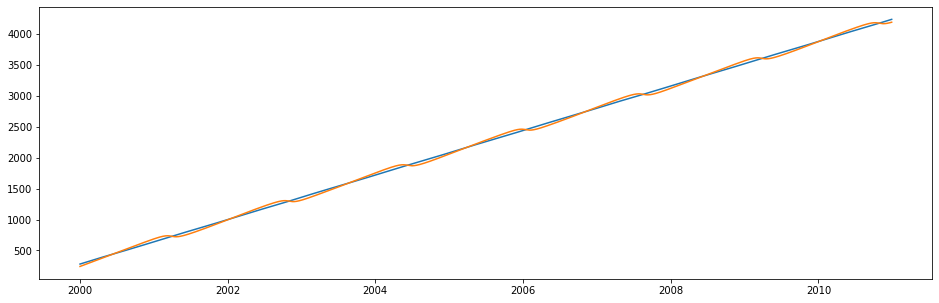

In [107]:
plt.figure(figsize=(16,5))
plt.plot(times.datetime, np.unwrap(geocen['sun']['theta'], discont=180*u.deg))
plt.plot(times.datetime, np.unwrap(geocen['venus']['theta'], discont=180*u.deg))
#plt.plot(times.datetime, geocen['venus']['theta'])

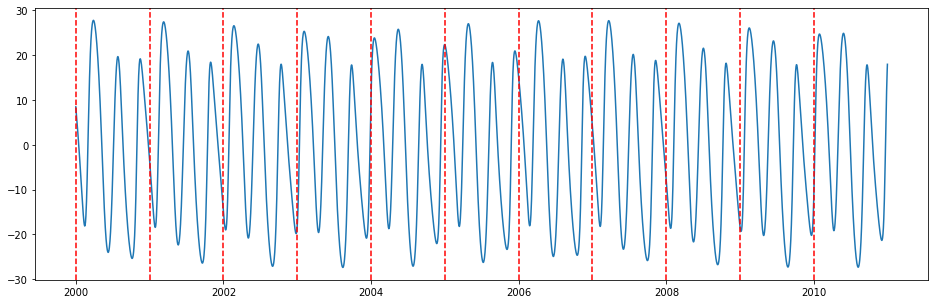

In [128]:
# Venus always stays close to the sun, right?  
plt.figure(figsize=(16,5))
plt.plot(times.datetime, mercury_elong)
for y in times.datetime[0::365]:
    plt.axvline(y,color='red', linestyle='--')

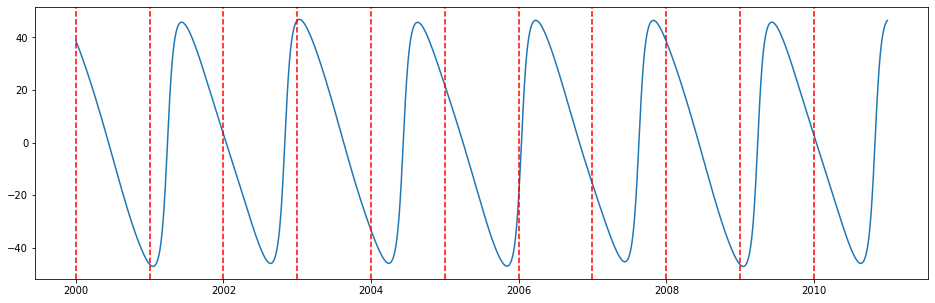

In [129]:
# Venus always stays close to the sun, right?  
plt.figure(figsize=(16,5))
plt.plot(times.datetime, venus_elong)
for y in times.datetime[0::365]:
    plt.axvline(y,color='red', linestyle='--')

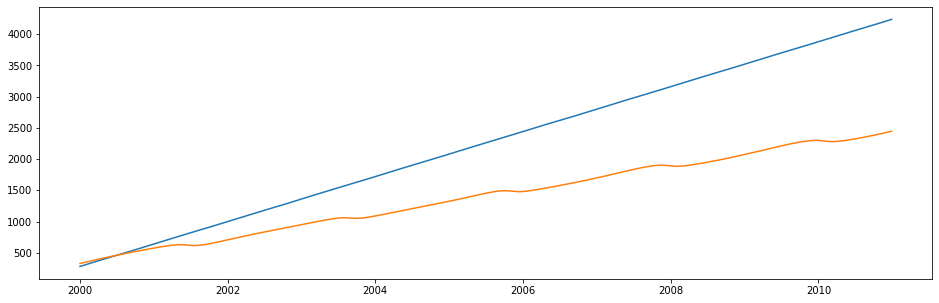

In [130]:
# How do I suss out the period of the epicycle?
plt.figure(figsize=(16,5))
plt.plot(times.datetime, np.unwrap(geocen['sun']['theta'], discont=180*u.deg))
plt.plot(times.datetime, np.unwrap(geocen['mars']['theta'], discont=180*u.deg))

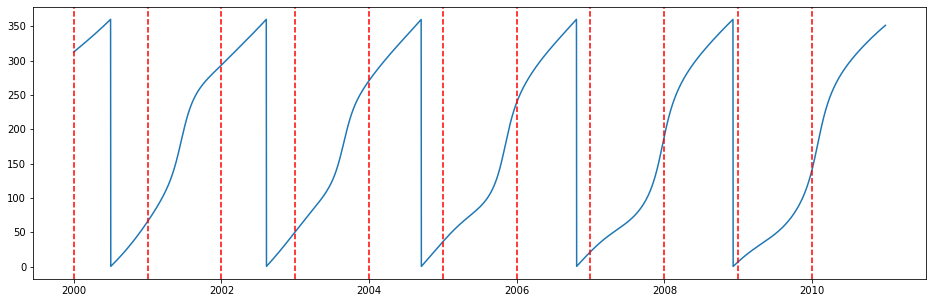

In [132]:
# Venus always stays close to the sun, right?  
plt.figure(figsize=(16,5))
plt.plot(times.datetime, np.mod(mars_elong, 360.*u.deg))
for y in times.datetime[0::365]:
    plt.axvline(y,color='red', linestyle='--')